# Parte 1

#### Importações 

In [2]:
import numpy as np

import cv2

from google.colab.patches import cv2_imshow

#### Lendo a imagem original 

In [3]:
img = cv2.imread('imagem-com-ruido.png', 0)

#### Criando o filtro e aplicando na imagem

In [59]:
filter = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
img_filtred = []
for y in range(3):
    a = np.copy(img)
    a = np.roll(a, y - 1, axis=0)
    for x in range(3):
        b= np.copy(a)
        b = np.roll(b, x - 1, axis=1)*filter[y,x]
        img_filtred.append(b)

img_filtred = np.array(img_filtred)

img_filtred = np.sum(img_filtred, axis=0)

#### Resultado

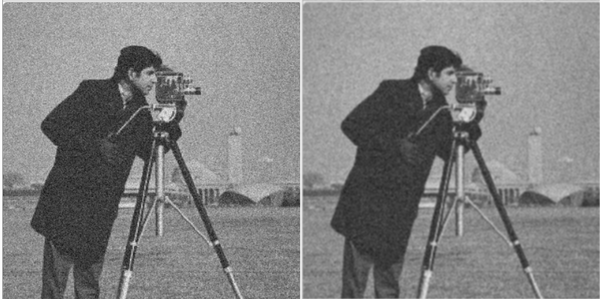

In [60]:
printed = np.concatenate((img, img_filtred), axis=1)

cv2_imshow(printed)

# Parte 2

#### Importações

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Lendo o Arquivo

In [4]:
data = pd.read_csv("campeonato-brasileiro-full.csv")

data['Ano'] = data['Data'].apply(lambda x: str(x).split('-')[0])

data['Ano'] = data['Ano'].astype(np.int64)

### 1) Qual o time que mais empatou em 2002 sendo visitante?

In [8]:
team_more_tied = data.query("Ano == 2002 and Vencedor == '-'")

team_more_tied = team_more_tied.groupby('Visitante').count()

team_more_tied = team_more_tied.sort_values(by = 'Vencedor', ascending=False).reset_index().iloc[0]

print(f"O time que mais empatou como visitante em 2002 foi {team_more_tied['Visitante']}")

O time que mais empatou como visitante em 2002 foi Internacional


### 2) Qual time que mais venceu jogando quarta-feira?


In [6]:
more_won_wednesday = data.query("Dia == 'Quarta-Feira' and Vencedor != '-'")

more_won_wednesday = more_won_wednesday.groupby('Vencedor').count()

more_won_wednesday = more_won_wednesday.sort_values(by = 'Dia', ascending=False).reset_index().iloc[0]

print(f"O time que mais venceu jogando em quarta-feira foi o {more_won_wednesday['Vencedor']}")

O time que mais venceu jogando em quarta-feira foi o Corinthians


### 3) Qual a quantidade de gols marcados por time em 2007 como mandante?

In [5]:
home_teams_goals_2007 = data[data["Ano"] == 2007]

home_teams_goals_2007 = home_teams_goals_2007.groupby('Mandante').sum().reset_index()

home_teams_goals_2007 =  home_teams_goals_2007.sort_values(by= 'Mandante')

home_teams_goals_2007 = home_teams_goals_2007[['Mandante', 'Mandante Placar']]

print(home_teams_goals_2007)

         Mandante  Mandante Placar
0      América-RN               12
1    Athlético-PR               29
2     Atlético-MG               40
3     Botafogo-RJ               38
4     Corinthians               17
5        Cruzeiro               44
6     Figueirense               35
7        Flamengo               37
8      Fluminense               30
9           Goiás               32
10         Grêmio               32
11  Internacional               27
12      Juventude               25
13        Náutico               35
14      Palmeiras               27
15         Paraná               24
16         Santos               36
17          Sport               40
18      São Paulo               35
19          Vasco               43


### Em grafico

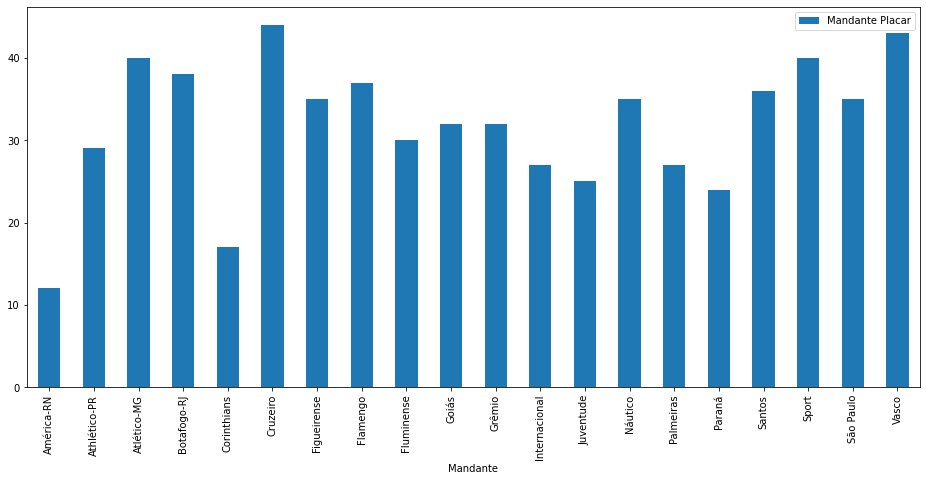

In [9]:

home_teams_goals_2007.plot(x = 'Mandante', kind='bar', figsize = (16,7))

plt.show()

### 4) Qual a rodada que mais teve gols em 2015?

In [10]:
round_more_goals_2015 =  data[data['Ano'] == 2015]

round_more_goals_2015 = round_more_goals_2015.groupby('Rodada').sum()

round_more_goals_2015['Total_Gols'] = round_more_goals_2015['Mandante Placar'] + round_more_goals_2015['Visitante Placar']

round_more_goals_2015 = round_more_goals_2015.sort_values(by = 'Total_Gols', ascending=False).reset_index().iloc[0]

print(f"A Rodada {round_more_goals_2015['Rodada']} foi a que teve mais gols em 2015")

A Rodada 31 foi a que teve mais gols em 2015


### 5) Qual foi a arena que mais sediou jogos de 2010 até 2016?

In [11]:
stadium_more_games_2010_2016 = data.query("Ano >= 2010 and Ano <= 2016")

stadium_more_games_2010_2016 = stadium_more_games_2010_2016.groupby('Arena').count()

stadium_more_games_2010_2016 = stadium_more_games_2010_2016.sort_values('Rodada', ascending= False).reset_index().iloc[0]

print(f"A Arena que mais sediou jogos entre 2010 e 2016 foi o {stadium_more_games_2010_2016['Arena']}.")

A Arena que mais sediou jogos entre 2010 e 2016 foi o Maracanã.
